<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [68]:
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum
import warnings
warnings.filterwarnings("ignore")

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">BÀI TẬP 1</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        BÀI TẬP 1
    </h1>
</div>


In [69]:
url = "https://drive.google.com/file/d/1F1GK8H-YK_y-5n57YmfK2-p7aB6Ien9L/view?usp=sharing"
new_url = "https://drive.google.com/uc?id=" + url.split('/')[-2]
df_tip = pd.read_csv(new_url, on_bad_lines = "skip")
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Data Description:**<br>
* **total_bill**: This column records the total bill amount of the transaction, which includes the cost of the meal and any additional charges.
* **tip**: The "tip" column contains the amount of money given by the customer as a tip for the service received.
* **sex**: This column indicates the gender of the customer.
* **smoker**: The "smoker" column represents whether the customer is a smoker or a non-smoker.
* **day**: The "day" column denotes the day of the week when the transaction occurred.
* **time**: This column specifies whether the transaction took place during lunchtime or dinnertime.
* **size**: The "size" column indicates the size of the dining party (number of people).

In [70]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [71]:
caterical_feature = ["sex", "smoker", "day", "time"]
def convert_cat(df = df_tip, caterical_feature = caterical_feature):
    for feature in caterical_feature:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass
convert_cat()

In [72]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Vẽ một biểu đồ phân tán (scatter chart) bằng thư viện matplotlib trong Python để hiển thị mối quan hệ giữa các ngày và số tiền tip.

In [73]:
df_tip["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [74]:
# Định nghĩa thứ tự ngày trong tuần
day_order = ["Thur", "Fri", "Sat", "Sun"]

# Sắp xếp df_day_vs_tip theo thứ tự ngày trong tuần
df_tip["day"] = pd.Categorical(df_tip["day"], categories=day_order, ordered=True)
df_tip = df_tip.sort_values(by="day")

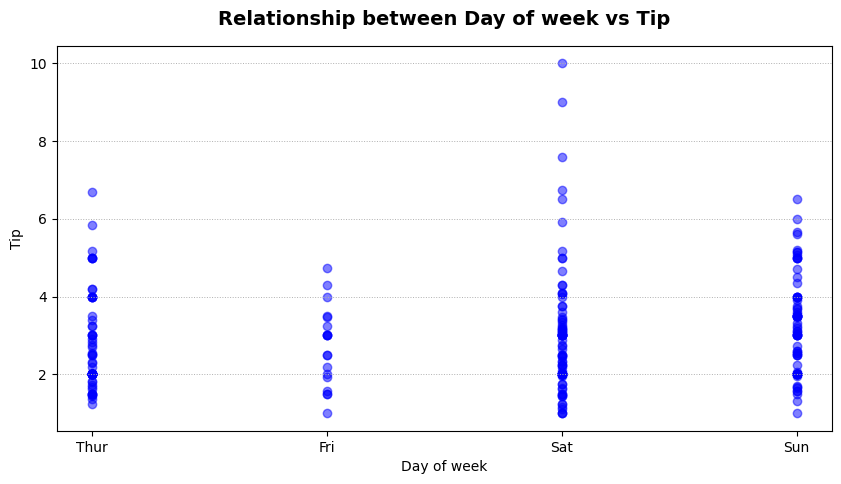

In [75]:
plt.figure (figsize = (10, 5))
plt.scatter(df_tip["day"], df_tip["tip"], color = "blue", alpha=0.5)
plt.grid(axis="y", linestyle=":", linewidth=0.7)
plt.xlabel ("Day of week")
plt.ylabel ("Tip")
plt.title ("Relationship between Day of week vs Tip", fontsize = 14, weight="bold", pad = 15)
plt.show()

* Mật độ tiền tip nhận được dày đặc vào 2 ngày cuối tuần.
* Số tiền tip cao nhất là 10 đô.

## Vẽ một biểu đồ cột (bar chart) bằng thư viện matplotlib trong Python để hiển thị mối quan hệ giữa các ngày và số tiền tip.

In [76]:
df_tip["day"] = df_tip["day"].str.strip()
df_day_vs_tip = df_tip.groupby (by = "day", as_index = False, observed=False)\
    .agg (total_tip = ("tip", "sum"))

df_day_vs_tip["day"] = pd.Categorical(df_day_vs_tip["day"], categories=day_order, ordered=True)
df_day_vs_tip = df_day_vs_tip.sort_values(by="day")

df_day_vs_tip

,day,total_tip
3,Thur,171.83
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39


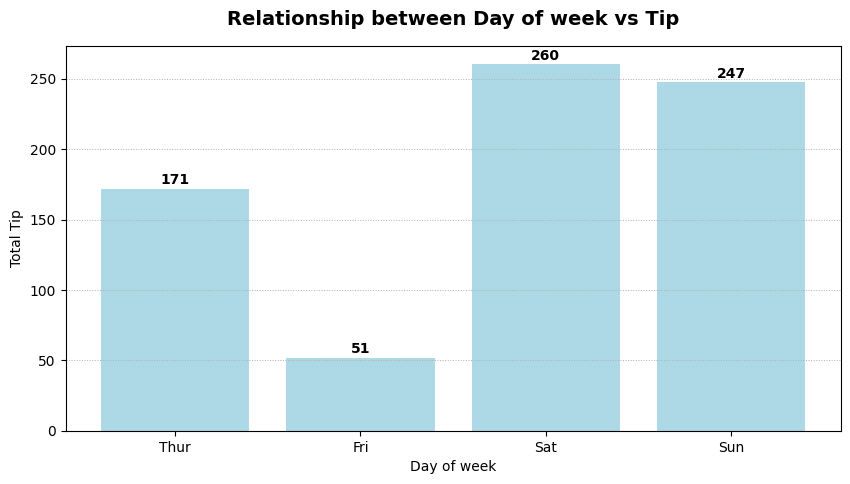

In [77]:
plt.figure (figsize = (10, 5))
bars = plt.bar(df_day_vs_tip["day"], df_day_vs_tip["total_tip"], color = "lightblue")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             str(int(bar.get_height())),
             ha="center", va="bottom", fontsize=10, weight="bold")
plt.grid(axis="y", linestyle=":", linewidth=0.7)
plt.xlabel ("Day of week")
plt.ylabel ("Total Tip")
plt.title ("Relationship between Day of week vs Tip", fontsize = 14, weight="bold", pad = 15)
plt.show()

* Tổng số tiền tip cho nhân viên phục vụ rơi vào 2 ngày cuối tuần.

## Vẽ một biểu đồ phân phối tần suất (histogram) bằng thư viện matplotlib trong Python để hiển thị phân phối giá trị hóa đơn “total_bill”.

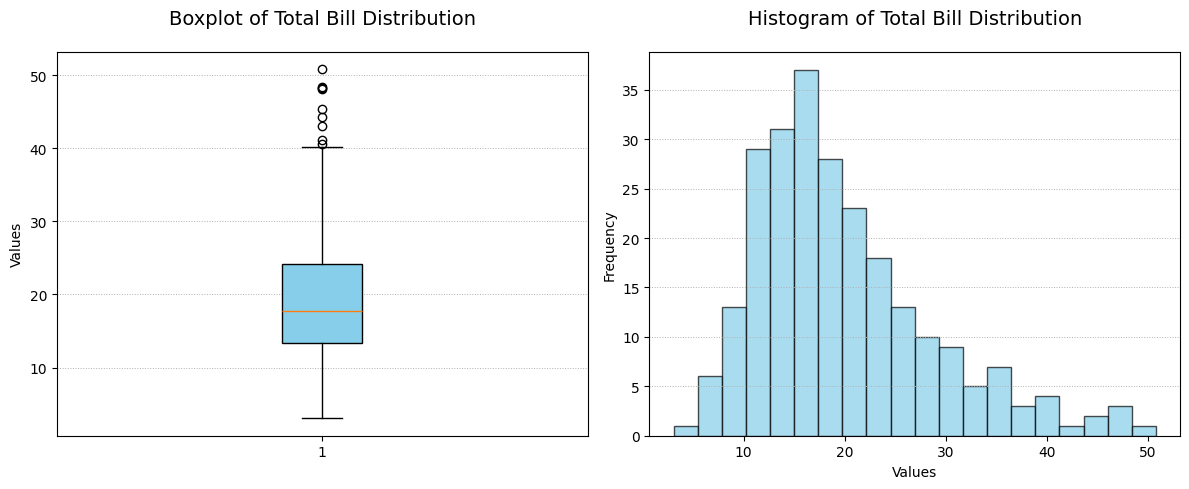

In [78]:
# Tạo figure và các axes
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))

# Vẽ boxplot
ax[0].set_title("Boxplot of Total Bill Distribution", fontsize=14, pad=20)
ax[0].set_ylabel("Values")
ax[0].boxplot(df_tip["total_bill"], vert=True, patch_artist=True, 
              boxprops=dict(facecolor="skyblue", color="black"))
ax[0].grid(axis="y", linestyle=":", linewidth=0.7)

# Vẽ histogram
ax[1].set_title("Histogram of Total Bill Distribution", fontsize=14, pad=20)
ax[1].set_xlabel("Values")
ax[1].set_ylabel("Frequency")
ax[1].hist(df_tip["total_bill"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
ax[1].grid(axis="y", linestyle=":", linewidth=0.7)

# Tùy chỉnh layout
plt.tight_layout()
plt.show()

In [79]:
def checking_outlier(list_feature, df = df_tip):
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            outlier_detail = ""
        else:
            outlier_detail = outliers.tolist()
        outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            "Outlier Detail": outlier_detail
        })
    return pd.DataFrame(outlier_info)

In [80]:
list_feature = ["total_bill", "tip", "size"]
checking_outlier(list_feature=list_feature)

,Feature,Outlier Count,Outlier Detail
0,total_bill,9,"[43.11, 41.19, 50.81, 48.33, 48.27, 44.3, 40.55, 45.35, 48.17]"
1,tip,9,"[6.7, 10.0, 7.58, 6.5, 9.0, 6.73, 5.92, 6.0, 6.5]"
2,size,9,"[6, 6, 5, 6, 5, 5, 5, 5, 6]"


* Dựa vào biểu đồ thì có thể thấy giá trị bill rơi vào khoảng `13$`và `24$` đô.
* Bill nhỏ nhất là `3.07$`
* Bill lớn nhất là `40$`.
* Tồn tại các giá trị Oulier nhưng không thể xóa vì có những khách hàng chi mạnh tay vào hôm đó nên đây là dữ liệu thực tế không xóa được.

## Vẽ một biểu đồ phân tán (scatter chart) bằng thư viện seaborn trong Python để hiển thị mối quan hệ giữa các ngày và số tiền tip, và sử dụng màu sắc để phân biệt giới tính của khách hàng.

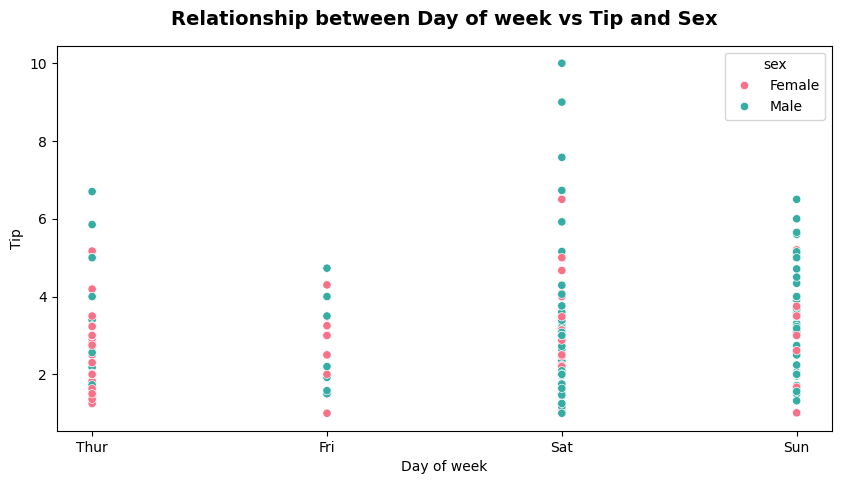

In [81]:
plt.figure (figsize = (10, 5))
sns.scatterplot(data=df_tip, x="day", y="tip", hue="sex", palette="husl")
plt.xlabel ("Day of week")
plt.ylabel ("Tip")
plt.title ("Relationship between Day of week vs Tip and Sex", fontsize = 14, weight="bold", pad = 15)
plt.show()

* Rõ ràng nam giới hào phóng hơn nữ giới.

## Vẽ một biểu đồ đường (line chart) bằng thư viện seaborn trong Python để hiển thị mối quan hệ giữa số tiền tip và size.

In [82]:
df_tip["tip"].value_counts()

tip
2.00    33
3.00    23
4.00    12
2.50    10
5.00    10
        ..
5.15     1
4.50     1
2.61     1
3.75     1
1.01     1
Name: count, Length: 123, dtype: int64

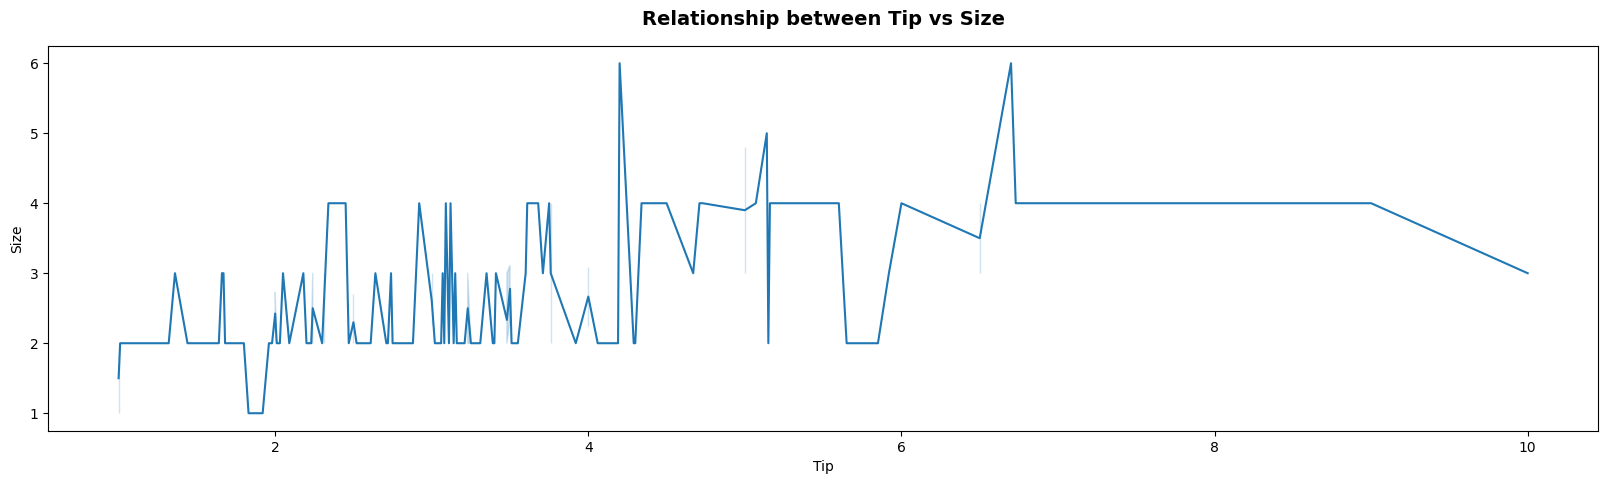

In [83]:
plt.figure (figsize = (20, 5))
sns.lineplot(data=df_tip, x="tip", y="size", sort=True)
plt.xlabel ("Tip")
plt.ylabel ("Size")
plt.title ("Relationship between Tip vs Size", fontsize = 14, weight="bold", pad = 15)
plt.show()

* Số lượng tiền tip dao động mạnh nhất là từ 2 đến 4 đô tương ứng với size là từ 2 đến 4 (tức là 2 đến 4 người cho bữa ăn) và sau đó thì thưa dần.

**Insight:** <br>
Dựa vào những biểu đồ trên chúng ta có thể kết luận: <br>
- Khách dùng hay dùng bữa vào 2 ngày cuối tuần và số lượng người tham dự thường từ 2 đến 4 người.
- Giá trị cho bữa ăn thì rơi vào khoảng `13$`và `24$`. Và nam giới thì hào phóng hơn nữ giới về tiền tip cho nhân viên phục vụ.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">BÀI TẬP 2</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        BÀI TẬP 2
    </h1>
</div>


In [84]:
df = pd.read_csv("Form_Feedback_New_V1_modified.csv")
df.head()

,First name,Name,Email,Mobile phone,Correct,Score,Involveme project,Seconds to complete,Submission time,Mã lớp của bạn là gì?,Bạn đang học tại nhóm số?,Feedback lần thứ?,CS_collect,Learning Methods,Feedback CSVC,CSVC Detail,"Ý kiến khác, vui lòng điền chi tiết",CS_Attitude feedback,Detail CS,Teacher feedback,Detail Teacher,Teacher Asssistant feedback,Detail Teacher Assistant,Learning Assessment,Detail Learning Assessment,Ý kiến thêm,Anonymized IP,Detected Country,Khóa học có đáp ứng được các mục tiêu học tập của bạn không?,"Nếu có thể, bạn sẵn sàng chia sẻ hoặc giới thiệu cho những người khác cũng có cùng nhu cầu học tập về khoá học tại MindX chứ?","Duplicate-1-enduplicateÝ kiến khác, vui lòng điền chi tiết","Duplicate-2-enduplicateÝ kiến khác, vui lòng điền chi tiết","Duplicate-3-enduplicateÝ kiến khác, vui lòng điền chi tiết"
0,Nguyễn,Minh,nguyenminh@example.com,88072289,0,0,Form Feedback New_V1,110,2024-09-04 15:09:54,Class-A1,2,2,Quỳnh Trang,Offline tại cơ sở,4. Hài lòng,NaN,NaN,5. Rất hài lòng,NaN,5. Rất hài lòng,NaN,5. Rất hài lòng,NaN,4. Hài lòng,NaN,không có,a7470d8037479b0264ae090b5219271710fb1e69,Viet Nam,Có,3. Sẵn sàng,NaN,NaN,NaN
1,Trần,Tùng,trantung@example.com,62222716,0,0,Form Feedback New_V1,184,2024-09-04 15:11:13,Class-B2,3,2,Quỳnh Trang,Offline tại cơ sở,4. Hài lòng,NaN,NaN,4. Hài lòng,NaN,4. Hài lòng,NaN,5. Rất hài lòng,NaN,4. Hài lòng,NaN,NaN,d0ef6c22e316d41e656f7ff658c2b07a8664133b,Viet Nam,Có,2. Còn tuỳ trường hợp,NaN,NaN,NaN
2,Lê,Hà,leha@example.com,10743851,0,0,Form Feedback New_V1,184,2024-09-04 15:12:11,Class-C3,1,2,Quỳnh Trang,Offline tại cơ sở,5. Rất hài lòng,NaN,NaN,4. Hài lòng,NaN,3. Chấp nhận được,"Thời gian học, Khả năng giảng dạy",2. Không hài lòng,"Khả năng hướng dẫn của mentor, Thái độ hướng dẫn, giải đáp thắc mắc của mentor về phần chuyên môn",4. Hài lòng,NaN,NaN,243680e462af87117f7d121d0b001542e47ce088,Viet Nam,Có,2. Còn tuỳ trường hợp,NaN,NaN,NaN
3,Phạm,Anh,phamanh@example.com,65365220,0,0,Form Feedback New_V1,113,2024-09-04 15:12:02,Class-D4,3,2,Quỳnh Trang,Offline tại cơ sở,4. Hài lòng,NaN,NaN,4. Hài lòng,NaN,4. Hài lòng,NaN,4. Hài lòng,NaN,4. Hài lòng,NaN,NaN,f2f89e2c362b4d9501d3af0399da44115d03c0a3,Viet Nam,Có,2. Còn tuỳ trường hợp,NaN,NaN,NaN
4,Đỗ,Chí,dochí@example.com,28274934,0,0,Form Feedback New_V1,195,2024-09-04 15:14:01,Class-E5,2,2,Quỳnh Trang,Offline tại cơ sở,3. Chấp nhận được,"Thiết bị trong phòng (tivi, điều hòa, bàn ghế, ổ điện, bảng, bút lông)",NaN,4. Hài lòng,NaN,5. Rất hài lòng,NaN,4. Hài lòng,NaN,4. Hài lòng,NaN,mình nghĩ trước mỗi buổi học nên gửi slide trước để học viên đọc qua sẽ hiểu nhanh và nhớ lâu hơn,248a40d2fb5d42bfdd90319fe4ca906471b8a4f8,Viet Nam,có,3. Sẵn sàng,NaN,NaN,NaN


In [85]:
# Remove khoảng trắng 2 đầu trên mỗi column
df.columns = df.columns.str.strip()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 33 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                         --------------  ----- 
 0   First name                                                                                                                     284 non-null    object
 1   Name                                                                                                                           284 non-null    object
 2   Email                                                                                                                          284 non-null    object
 3   Mobile phone                                                                                                       

In [87]:
list_feature = ["Mã lớp của bạn là gì?", "Bạn đang học tại nhóm số?", "Learning Methods", "Feedback CSVC", 
                "CS_Attitude feedback", "Teacher feedback", "Teacher Asssistant feedback"]
df_new = df[list_feature]
df_new

,Mã lớp của bạn là gì?,Bạn đang học tại nhóm số?,Learning Methods,Feedback CSVC,CS_Attitude feedback,Teacher feedback,Teacher Asssistant feedback
0,Class-A1,2,Offline tại cơ sở,4. Hài lòng,5. Rất hài lòng,5. Rất hài lòng,5. Rất hài lòng
1,Class-B2,3,Offline tại cơ sở,4. Hài lòng,4. Hài lòng,4. Hài lòng,5. Rất hài lòng
2,Class-C3,1,Offline tại cơ sở,5. Rất hài lòng,4. Hài lòng,3. Chấp nhận được,2. Không hài lòng
3,Class-D4,3,Offline tại cơ sở,4. Hài lòng,4. Hài lòng,4. Hài lòng,4. Hài lòng
4,Class-E5,2,Offline tại cơ sở,3. Chấp nhận được,4. Hài lòng,5. Rất hài lòng,4. Hài lòng
...,...,...,...,...,...,...,...
279,K4,Nhóm 3,Offline tại cơ sở,4. Hài lòng,5. Rất hài lòng,5. Rất hài lòng,5. Rất hài lòng
280,Class0,1,Offline tại cơ sở,5. Rất hài lòng,5. Rất hài lòng,4. Hài lòng,4. Hài lòng
281,N2,Nhóm 1,100% Online qua Zooom,4. Hài lòng,4. Hài lòng,4. Hài lòng,4. Hài lòng
282,N2,1,100% Online qua Zooom,4. Hài lòng,4. Hài lòng,4. Hài lòng,4. Hài lòng


In [88]:
# Rename column
df_new.columns = ["id_class", "group", "learning_methods", "feedback_csvc", "cs_attitude_feedback", 
                  "teacher_feedback", "teacher_asssistant_feedback"]
df_new

,id_class,group,learning_methods,feedback_csvc,cs_attitude_feedback,teacher_feedback,teacher_asssistant_feedback
0,Class-A1,2,Offline tại cơ sở,4. Hài lòng,5. Rất hài lòng,5. Rất hài lòng,5. Rất hài lòng
1,Class-B2,3,Offline tại cơ sở,4. Hài lòng,4. Hài lòng,4. Hài lòng,5. Rất hài lòng
2,Class-C3,1,Offline tại cơ sở,5. Rất hài lòng,4. Hài lòng,3. Chấp nhận được,2. Không hài lòng
3,Class-D4,3,Offline tại cơ sở,4. Hài lòng,4. Hài lòng,4. Hài lòng,4. Hài lòng
4,Class-E5,2,Offline tại cơ sở,3. Chấp nhận được,4. Hài lòng,5. Rất hài lòng,4. Hài lòng
...,...,...,...,...,...,...,...
279,K4,Nhóm 3,Offline tại cơ sở,4. Hài lòng,5. Rất hài lòng,5. Rất hài lòng,5. Rất hài lòng
280,Class0,1,Offline tại cơ sở,5. Rất hài lòng,5. Rất hài lòng,4. Hài lòng,4. Hài lòng
281,N2,Nhóm 1,100% Online qua Zooom,4. Hài lòng,4. Hài lòng,4. Hài lòng,4. Hài lòng
282,N2,1,100% Online qua Zooom,4. Hài lòng,4. Hài lòng,4. Hài lòng,4. Hài lòng


In [89]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_class                     284 non-null    object
 1   group                        284 non-null    object
 2   learning_methods             283 non-null    object
 3   feedback_csvc                284 non-null    object
 4   cs_attitude_feedback         284 non-null    object
 5   teacher_feedback             284 non-null    object
 6   teacher_asssistant_feedback  284 non-null    object
dtypes: object(7)
memory usage: 15.7+ KB


In [90]:
# Remove hết khoảng trắng trong dữ liệu
for column in df_new.columns:
    df_new[column] = df_new[column].str.strip()

In [92]:
import re

def extract_title(name):
    p = re.compile(r"\s*(\d).*")
    return p.search(name).groups(1)[0].strip()

for column in df_new.columns:
    if column == "learning_methods":
        pass
    else:
        df_new[column] = df_new[column].apply(lambda name: extract_title(name))
df_new.head()

,id_class,group,learning_methods,feedback_csvc,cs_attitude_feedback,teacher_feedback,teacher_asssistant_feedback
0,1,2,Offline tại cơ sở,4,5,5,5
1,2,3,Offline tại cơ sở,4,4,4,5
2,3,1,Offline tại cơ sở,5,4,3,2
3,4,3,Offline tại cơ sở,4,4,4,4
4,5,2,Offline tại cơ sở,3,4,5,4


## Đánh giá mức độ hài lòng của học viên theo lớp

In [95]:
df_new["id_class"].value_counts().sort_index()

id_class
0    10
1    47
2    38
3    26
4    86
5    10
6    29
7     1
8    13
9    24
Name: count, dtype: int64

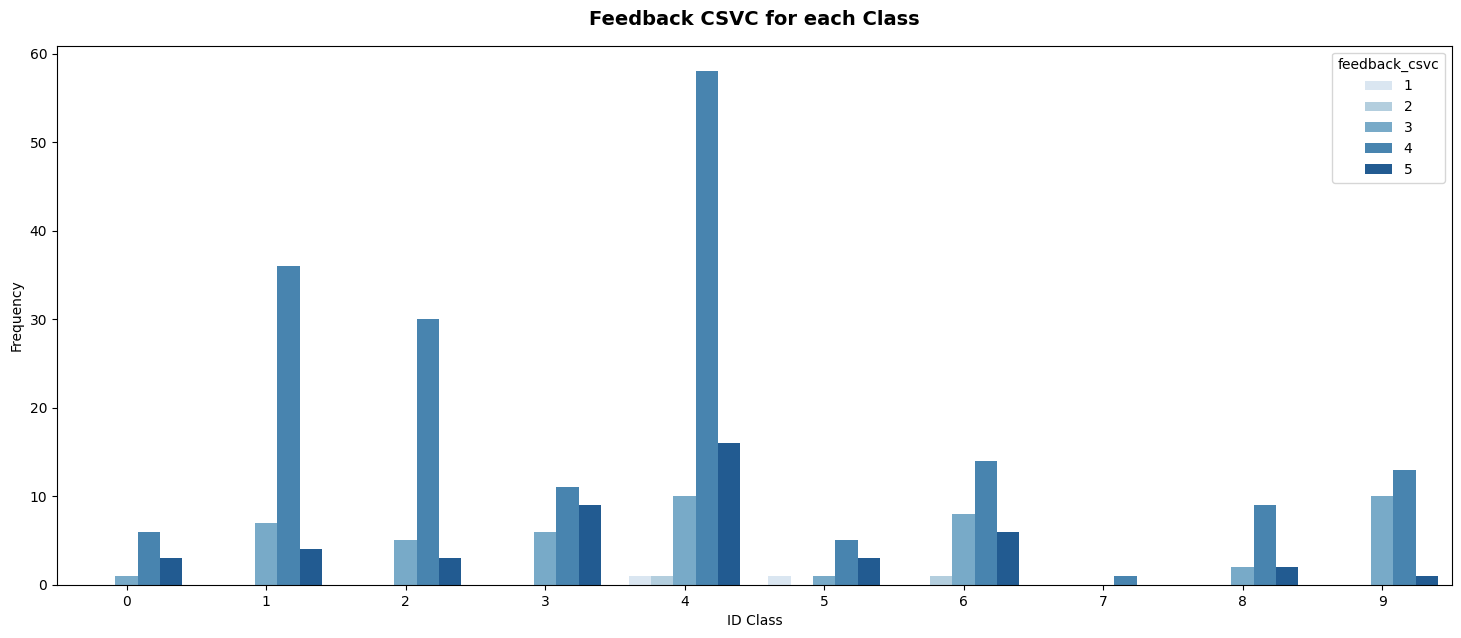

In [94]:
plt.figure (figsize = (18, 7))
sns.countplot(data=df_new, x="id_class", hue="feedback_csvc", palette="Blues", 
              order=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
              hue_order=["1", "2", "3", "4", "5"])
plt.xlabel ("ID Class")
plt.ylabel ("Frequency")
plt.title ("Feedback CSVC for each Class", fontsize = 14, weight="bold", pad = 15)
plt.show()

* Lớp 4 là lớp có nhiều học viên tham gia đánh giá nhất và cũng là lớp có số lượng học viên có mức độ hài lòng và rất hài lòng cao nhất trong tất cả các lớp.
* Nhiều lớp có số lượng học viên tham gia đánh giá ít và mức độ hài lòng cũng ít hơn so với lớp số 4.

## Đánh giá mức độ hài lòng thông qua hình thức học

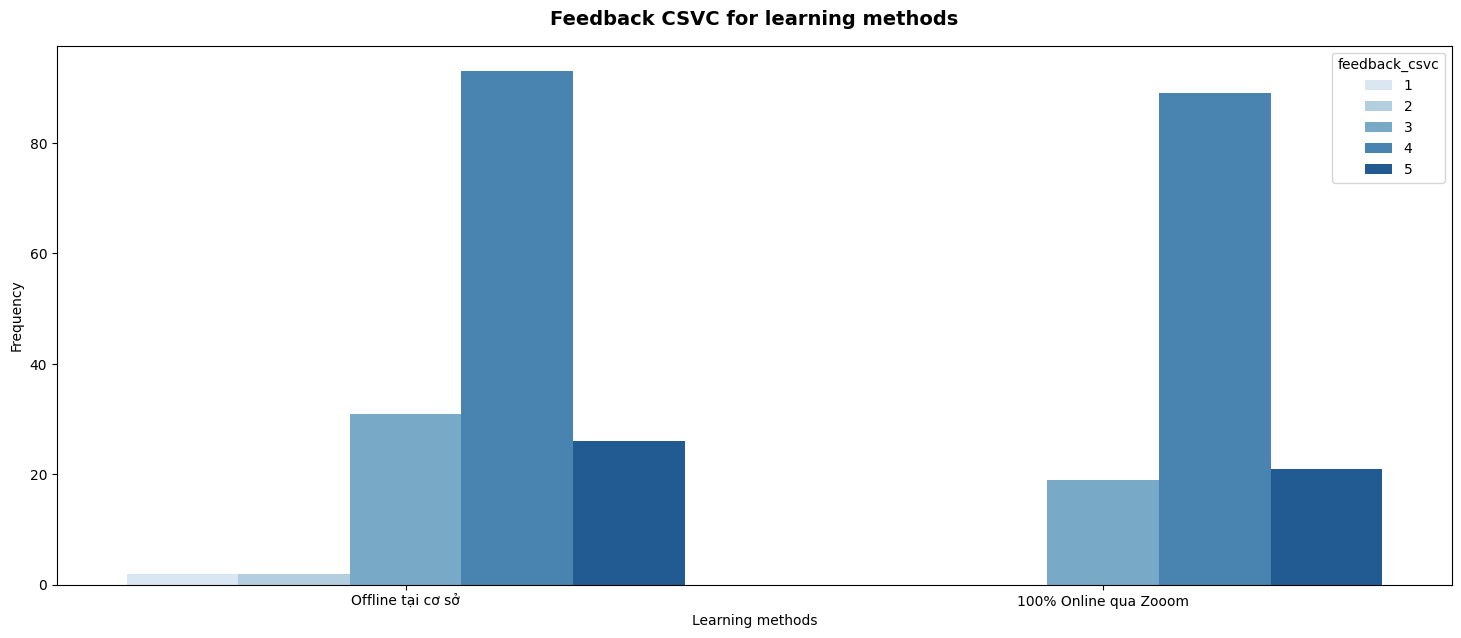

In [97]:
plt.figure (figsize = (18, 7))
sns.countplot(data=df_new, x="learning_methods", hue="feedback_csvc", palette="Blues",
              hue_order=["1", "2", "3", "4", "5"])
plt.xlabel ("Learning methods")
plt.ylabel ("Frequency")
plt.title ("Feedback CSVC for learning methods", fontsize = 14, weight="bold", pad = 15)
plt.show()

* Mặc dù học online không có tiếp xúc nhiều với mentor hoặc giảng viên nhưng nhớm **100% Online qua Zoom** lại không có mức đánh giá `1` và `2`. Ngược lại so với **Offline tại cơ sở**.